<a href="https://colab.research.google.com/github/AK-2406/Major-Project-/blob/main/YOLO%26OCR_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.8 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 37.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving best.pt to best.pt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving carnumberplates.jpg to carnumberplates.jpg


In [ ]:
# Print the file names and their content instead of location
for filename, content in uploaded.items():
    print(f"File '{filename}' uploaded successfully.")
    # To access the content (bytes), you can use content
    # print(f"Content of '{filename}': {content}")

File 'carnumberplates.jpg' uploaded successfully.


In [ ]:
!pip install Pillow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
image 1/1 /content/carnumberplates.jpg: 448x640 1 License_Plate, 50.4ms
Speed: 12.0ms preprocess, 50.4ms inference, 885.6ms postprocess per image at shape (1, 3, 448, 640)


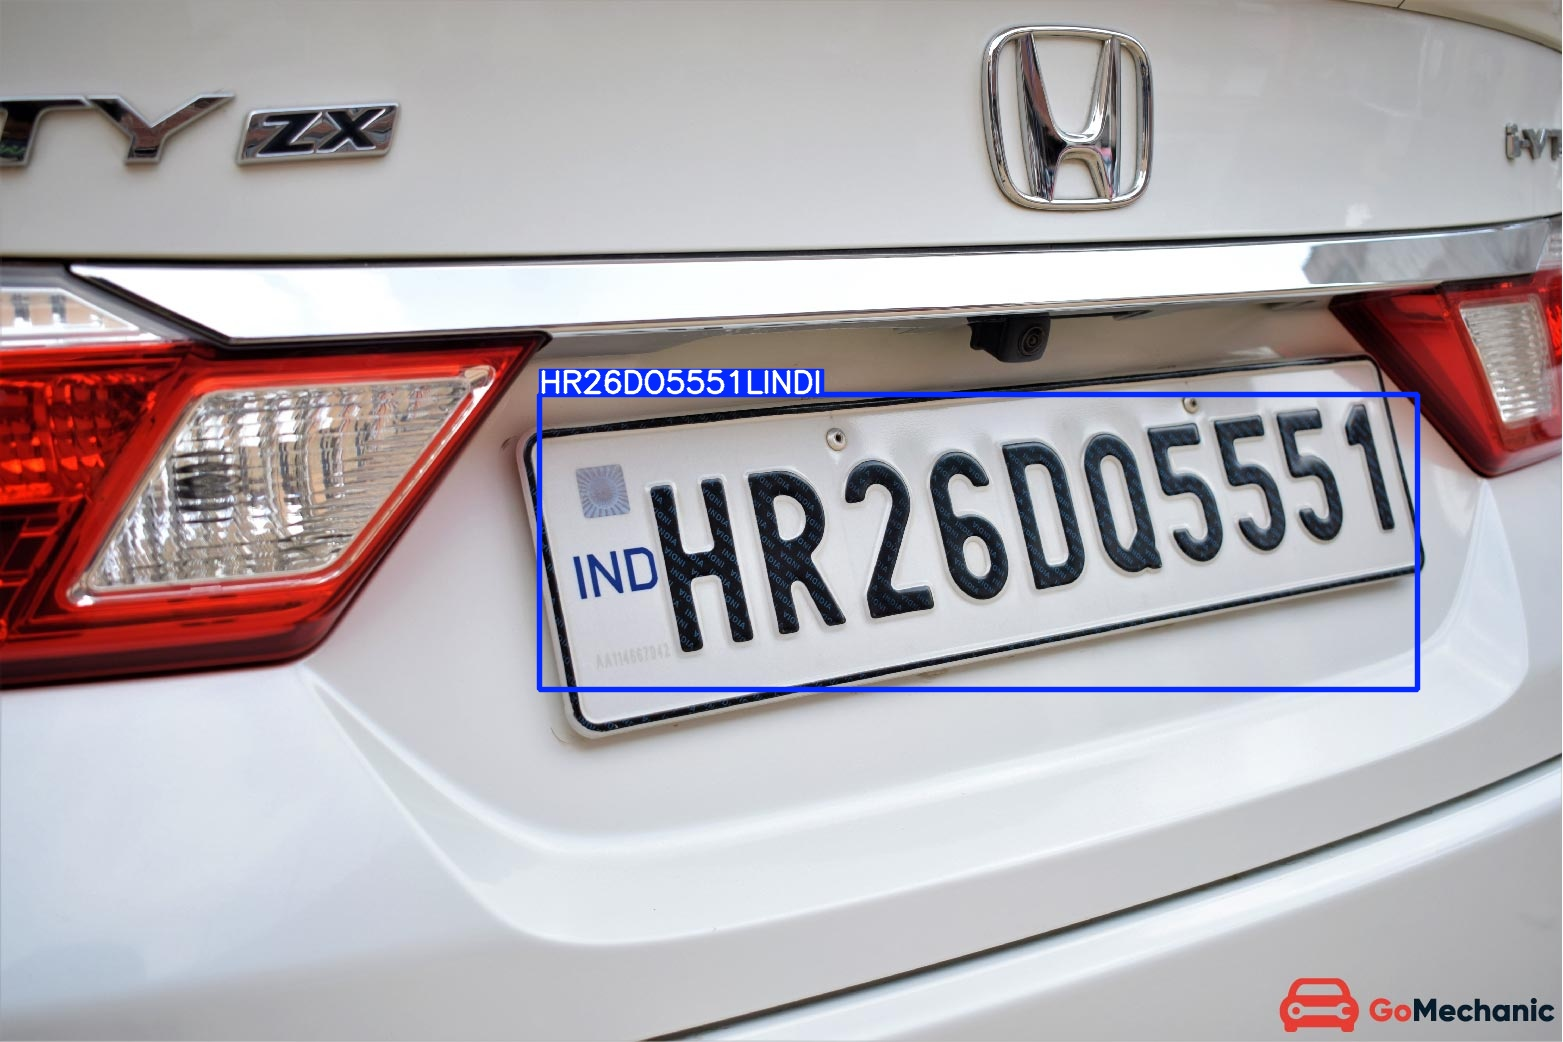

In [ ]:
import torch
import easyocr
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from google.colab.patches import cv2_imshow
from PIL import Image

# Load your trained YOLO model
model = YOLO('best.pt')  # Replace with the path to your trained model

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Add more languages if needed

# OCR Function
def getOCR(im, coors):
    x, y, w, h = int(coors[0]), int(coors[1]), int(coors[2]), int(coors[3])
    cropped = im[y:h, x:w]
    gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)
    results = reader.readtext(gray)

    #Combine text froma all recognized segments
    ocr_text = "".join([result[1] for result in results])

    #for result in results:
        #ocr_text = result[1]  # Extract text
    return ocr_text



# Run Inference
def run_inference(source):
    results = model(source)  # Perform object detection
    for result in results:
        annotator = Annotator(result.orig_img, line_width=3, example=str(model.names))
        for box in result.boxes:
            xyxy = box.xyxy[0]  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = box.cls[0]  # Class index
            label = f"{model.names[int(cls)]} {conf:.2f}"

            # Perform OCR on the detected region
            ocr_text = getOCR(result.orig_img, xyxy)
            if ocr_text:
                label = ocr_text  # Replace label with OCR text

            # Annotate the image
            annotator.box_label(xyxy, label, color=colors(int(cls), True))

        # Save or display the annotated image
        #cv2_imshow('Result', result.orig_img)
        #cv2.waitKey(0)
        cv2.imwrite('result.jpg', result.orig_img) # Save image to file

        # Open the image using Image.open and then display it
        display(Image.open('result.jpg'))  # Display in output
        cv2.waitKey(0)

# Example Usage
source_image = 'carnumberplates.jpg'  # Replace with the path to your image
run_inference(source_image)
